# This is Lab 1 executable file

This file contains program code, which is a solution to the problems in the file [lab_1_task.txt](https://github.com/RazinAleksandr/M-M-MSA-ITMO/blob/main/Lab_1/lab_1_task.txt)

In [1]:
# libs initialization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

from datetime import datetime
from prettytable import PrettyTable
from scipy.optimize import curve_fit, minimize

In [2]:
# Dataset initialization
path_to_file = '/home/aleksrazin/ITMO/M&MSA/train_data/covid_19.csv'
df = pd.read_csv(path_to_file, engine='python')
df = df[[    
    'steroid',
    'systolic_blood_pressure', 
    'diastolic_blood_pressure', 
    'heart_rate',
    'highest_heart_rate',
    'lowest_heart_rate', 
    'lowest_urine_output',
    'highest_ph',
    'hematocrit',
    'platelet_count',
    'potassium',
    'lowest_mean_arterial_pressure',
    'highest_mean_arterial_pressure',
    'temperature'
          ] ]
df.head(10)

,steroid,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,highest_heart_rate,lowest_heart_rate,lowest_urine_output,highest_ph,hematocrit,platelet_count,potassium,lowest_mean_arterial_pressure,highest_mean_arterial_pressure,temperature
0,No,119.0,54.0,79.0,80.0,73.0,700.0,NaN,0.354,116.0,4.1,85.0,85.0,37.2
1,Yes,133.0,64.0,73.0,73.0,69.0,1351.0,NaN,0.359,117.0,3.7,NaN,NaN,37.1
2,Yes,140.0,74.0,70.0,72.0,65.0,1420.0,NaN,0.372,145.0,4.0,NaN,NaN,37.5
3,Yes,154.0,78.0,77.0,80.0,72.0,350.0,NaN,0.383,218.0,3.9,NaN,NaN,37.1
4,Yes,155.0,61.0,64.0,77.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7
5,Yes,156.0,74.0,62.0,71.0,62.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,36.9
6,Yes,158.0,69.0,81.0,81.0,76.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,36.5
7,No,155.0,68.0,104.0,108.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
8,Yes,122.0,80.0,72.0,92.0,72.0,NaN,NaN,0.369,251.0,NaN,NaN,NaN,36.3
9,Yes,114.0,72.0,60.0,67.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9


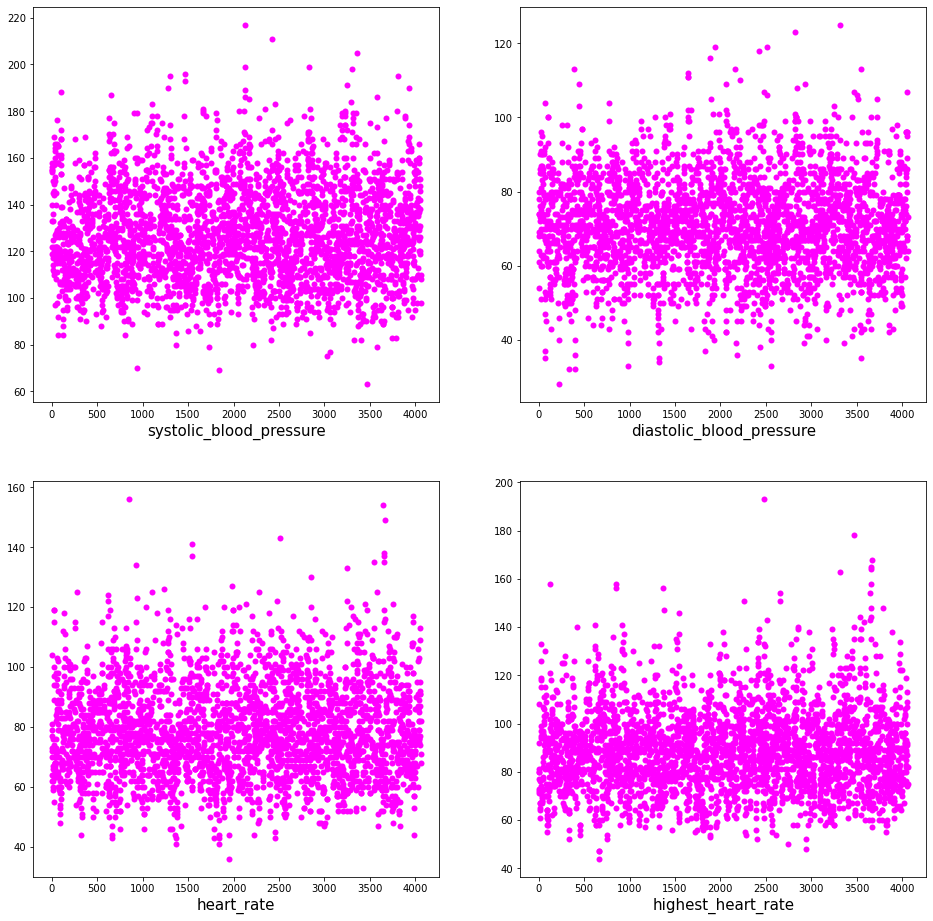

In [3]:
# Display our data
col_names = list(df.columns)

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
col_idx = 1
for i in range(2):
    for j in range(2):
        axes[i][j].scatter(df.index, df[col_names[col_idx]], c='magenta', linewidths=0.01)
        axes[i][j].set_xlabel(col_names[col_idx], fontsize = 15)
        col_idx += 1

# Exercise №2

You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

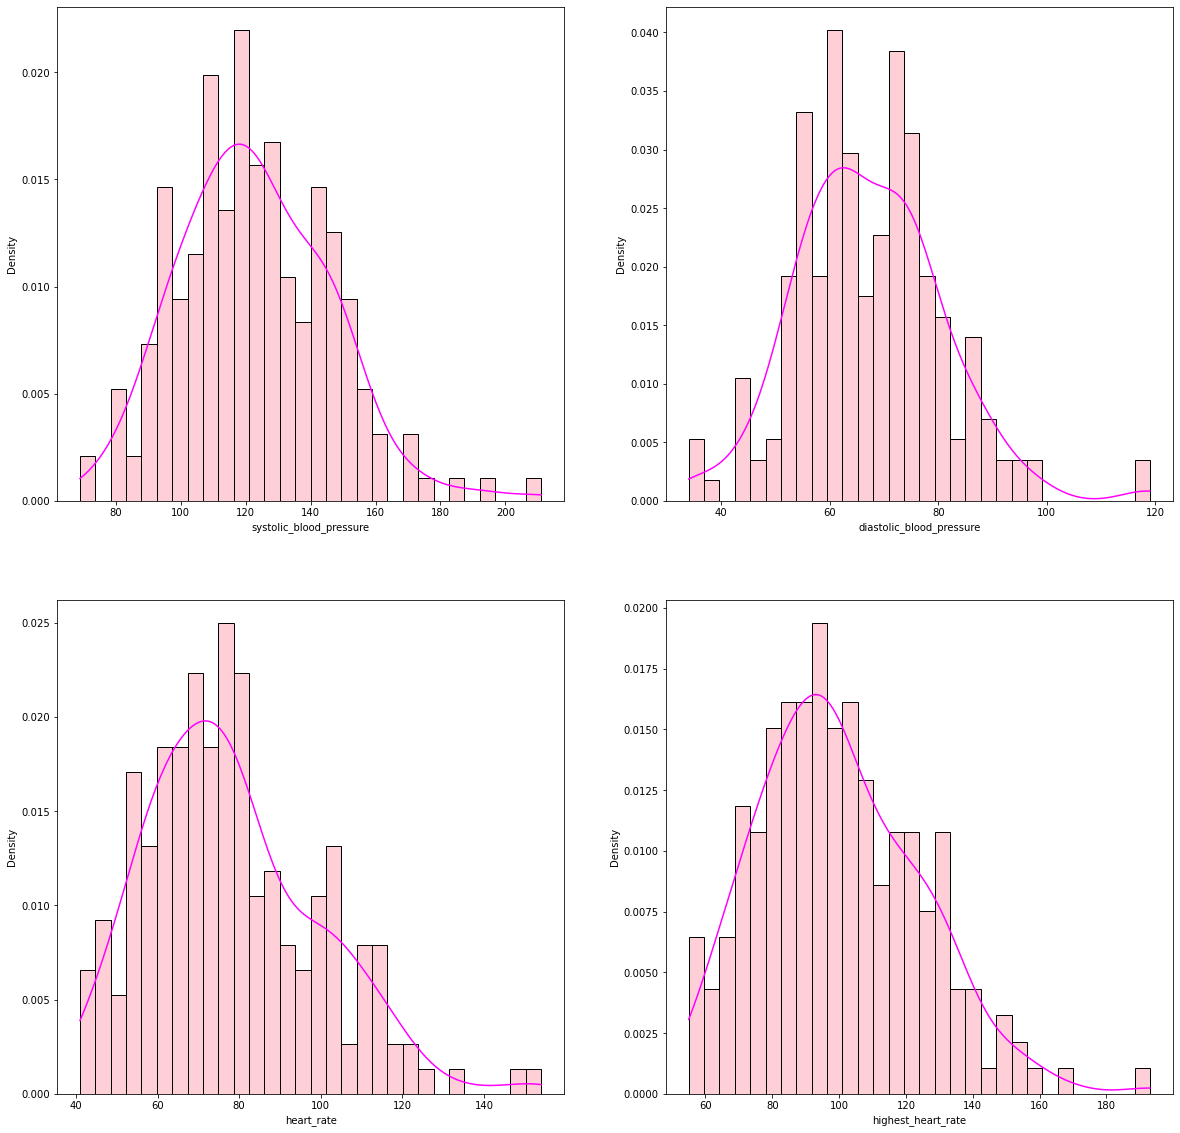

In [4]:
# Plotting a histogram and kernel density estimate
# Draw unnormed histogramm
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 1
for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]
        df=df.dropna()
        kernel = sp.stats.gaussian_kde(df[col_name])
        min_amount, max_amount = df[col_name].min(), df[col_name].max()
        x = np.linspace(min_amount, max_amount, len(df[col_name]))
        kde_values = kernel(x)
        sns.histplot(df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'pink')
        axes[i, j].plot(x, kde_values, c = 'magenta')
        col_idx += 1

# Exercise №3

You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

+--------------------------+--------------------+--------+--------------------+--------------------+
|       column name        |   m.expectation    | median |      variance      |    s.deviation     |
+--------------------------+--------------------+--------+--------------------+--------------------+
| systolic_blood_pressure  | 122.70792079207921 | 121.0  | 538.7252105807595  | 23.210454768934614 |
| diastolic_blood_pressure | 67.20297029702971  |  66.0  | 182.3317324269739  | 13.503026787612246 |
|        heart_rate        | 78.10396039603961  |  76.0  | 439.70555637653314 | 20.96915726433786  |
|    highest_heart_rate    | 99.86633663366337  |  97.0  | 579.4397566622331  | 24.071554928218347 |
+--------------------------+--------------------+--------+--------------------+--------------------+


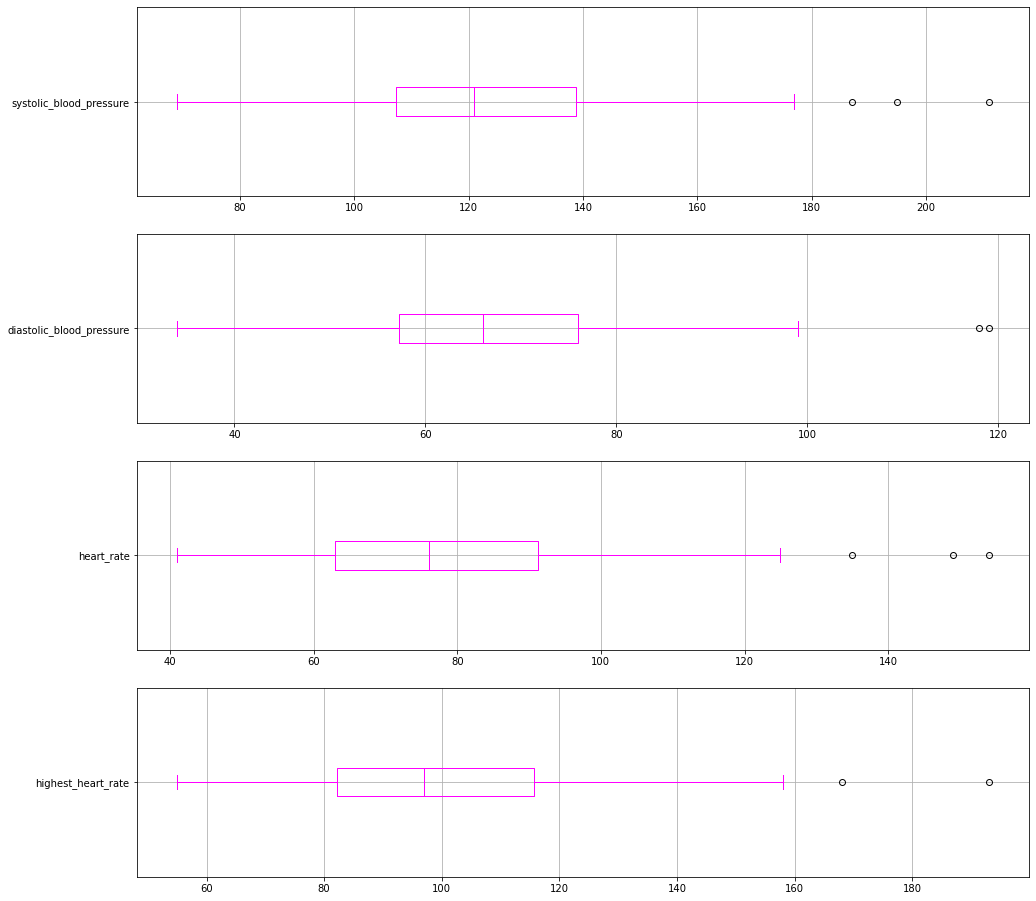

In [5]:
# Box plot
col_names = [
    'systolic_blood_pressure', 
    'diastolic_blood_pressure', 
    'heart_rate',
    'highest_heart_rate'
]

fig, axes = plt.subplots(len(col_names), figsize=(16, 16))

table = PrettyTable()
table.field_names = ["column name", "m.expectation", "median", "variance", "s.deviation"]

for col_idx in range(len(col_names)):
    # Calculation of sample mean, variance, standard deviation, median
    df=df.dropna()
    col_name = col_names[col_idx]
    mean = df[col_name].mean()
    var = df[col_name].var()
    std = df[col_name].std()
    median = df[col_name].median()
    
    table.add_row([col_names[col_idx], mean, median, var, std])

    whis_p = 1.5

    boxplot = df.boxplot(column=col_name, whis=whis_p, vert=False, ax=axes[col_idx], color='magenta')


print(table)


# Exercise №4

Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

column name: systolic_blood_pressure
MLE: (0.14367692232498774, -37.4539170111581, 158.51667565811556)
LSE: [ 7.32734315e-02 -1.95217371e+02  3.16269286e+02]
 
column name: diastolic_blood_pressure
MLE: (0.11004879760245606, -54.37371862844321, 120.84161025382616)
LSE: [  0.15543274 -16.23388392  82.87744334]
 
column name: heart_rate
MLE: (20.719495086626452, 11.988636066170837, 3.175153042848409)
LSE: [ 205.7527838 -131.836868 ]
 
column name: highest_heart_rate
MLE: (14.84931926041448, 33.74881597903993, 4.452561785696771)
LSE: [ 298.12621506 -201.64738218]
 


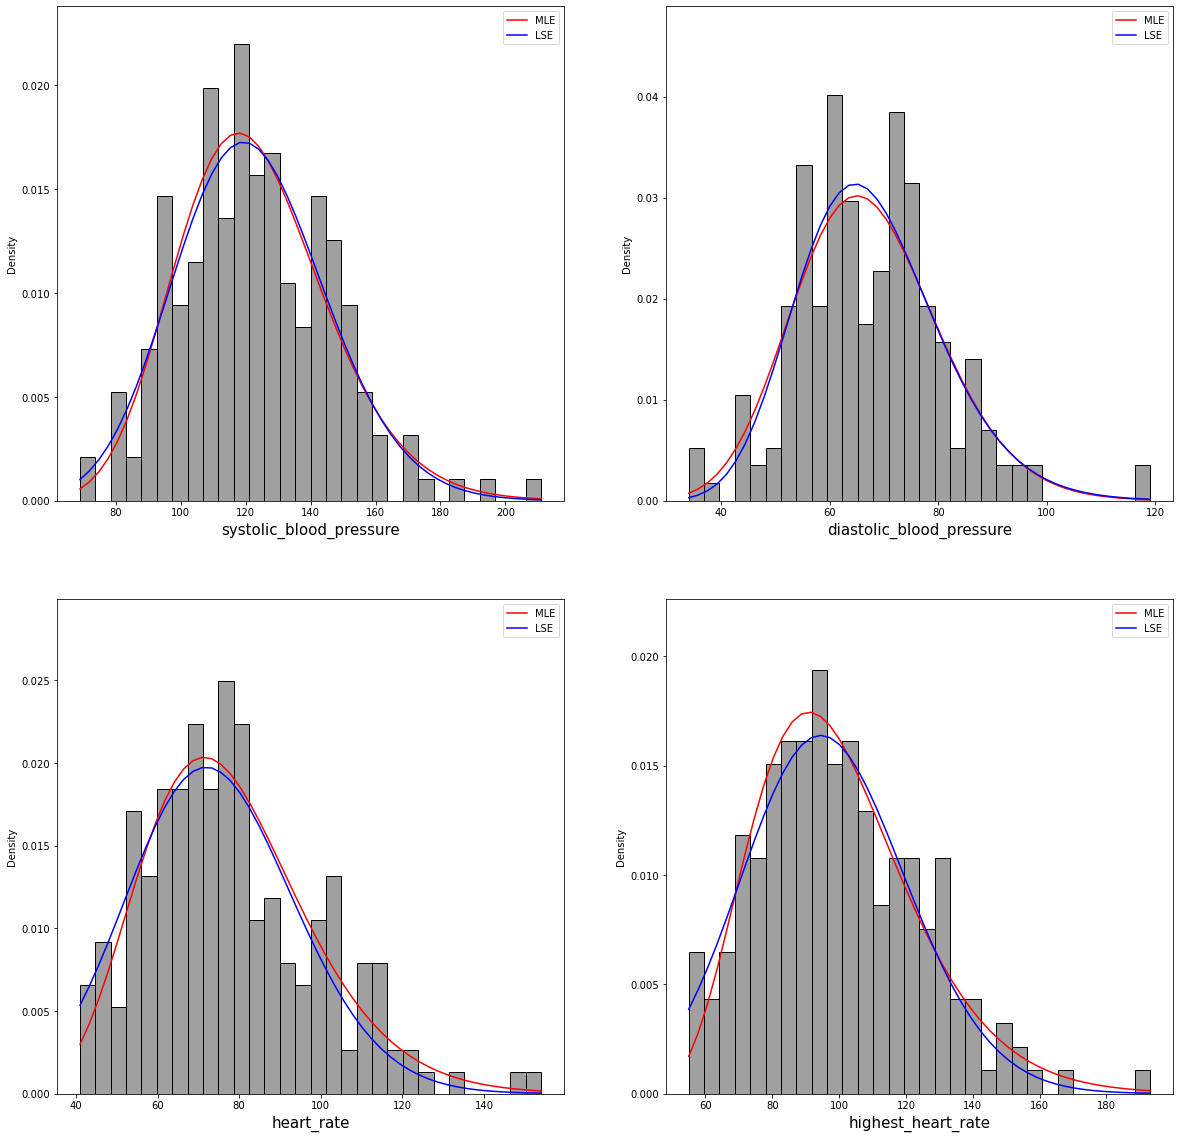

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0

mle_params_list = []
lse_params_list = []

table = PrettyTable()
table.field_names = ["column name", "MLE", "LSE"]

for i in range(2):
    for j in range(2):
    # Determination of the parameters of the distribution 
        col_name = col_names[col_idx]
        # Prepare data for least squares method, but do not show this histogramm
        hist_data = axes[i, j].hist(df[col_name], density=True, bins=50, color='grey', visible=False)
        sns.histplot(df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'grey')
        min_amount, max_amount = df[col_name].min(), df[col_name].max()

        #  The distribution parameters are determined using the fit function based on least squares method
        # Prepare data for least squares
        hist_bins = hist_data[1][:-1]  # remove last element
        delta = hist_bins[1]-hist_bins[0]
        hist_bins += delta / 2 # Take centres of bins
        hist_vals = hist_data[0] # Get the height of bins for least squares

        x = np.linspace(min_amount, max_amount)


        # Do MLE
        if col_name == 'systolic_blood_pressure' or col_name == 'diastolic_blood_pressure':
            # The lognorm distribution parameters are determined using the fit function based on the maximum likelihood method
            mle_params = sp.stats.lognorm.fit(df[col_name], loc=1.1, scale=1.1) # Make initial Guess
            pdf_mle = sp.stats.lognorm.pdf(x, *mle_params)

        elif col_name == 'heart_rate' or "highest_heart_rate":
            mle_params = sp.stats.chi2.fit(df[col_name], loc=1.1, scale=1.1)
            pdf_mle = sp.stats.chi2.pdf(x, *mle_params)

  
        axes[i, j].plot(x, pdf_mle, color='r', label="MLE")

        # Do LSE
        if col_name == 'systolic_blood_pressure' or col_name == 'diastolic_blood_pressure':
            def lognorm(arg_x, s, loc, scale):
                return sp.stats.lognorm.pdf(arg_x, s, loc, scale)
            
            def lst_sqrs(par_ar, gt, x):
                s, loc, scale = par_ar
                return sum((gt - lognorm(x, s, loc, scale))**2)

            lse_params = minimize(lst_sqrs, [1.1, 1.1, 1.1], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': False})
            pdf_lsm = sp.stats.lognorm.pdf(x, *lse_params.x)

        elif col_name == 'heart_rate' or "highest_heart_rate":
            def chi2(arg_x, loc, scale):
                return sp.stats.chi2.pdf(arg_x, loc, scale)
            
            def lst_sqrs(par_ar, gt, x):
                loc, scale = par_ar
                return sum((gt - chi2(x, loc, scale))**2)

            lse_params = minimize(lst_sqrs, [10., 10.], method = 'Nelder-Mead', args=(hist_vals, hist_bins), tol=0.001, options={'disp': False})
            pdf_lsm = sp.stats.chi2.pdf(x, *lse_params.x)
           

        mle_params_list.append(mle_params)
        lse_params_list.append(lse_params.x)

        axes[i, j].plot(x, pdf_lsm, color='b', label='LSE')
        axes[i, j].set_xlabel(col_names[col_idx], fontsize = 15)
        axes[i, j].legend()
        col_idx += 1

        table.add_row([col_name, mle_params, lse_params.x])
        print(f'column name: {col_name}\nMLE: {mle_params}\nLSE: {lse_params.x}')
        print(' ')

#print(table)

# Exercise №6

Validate your estimated parameters using QQ biplots.

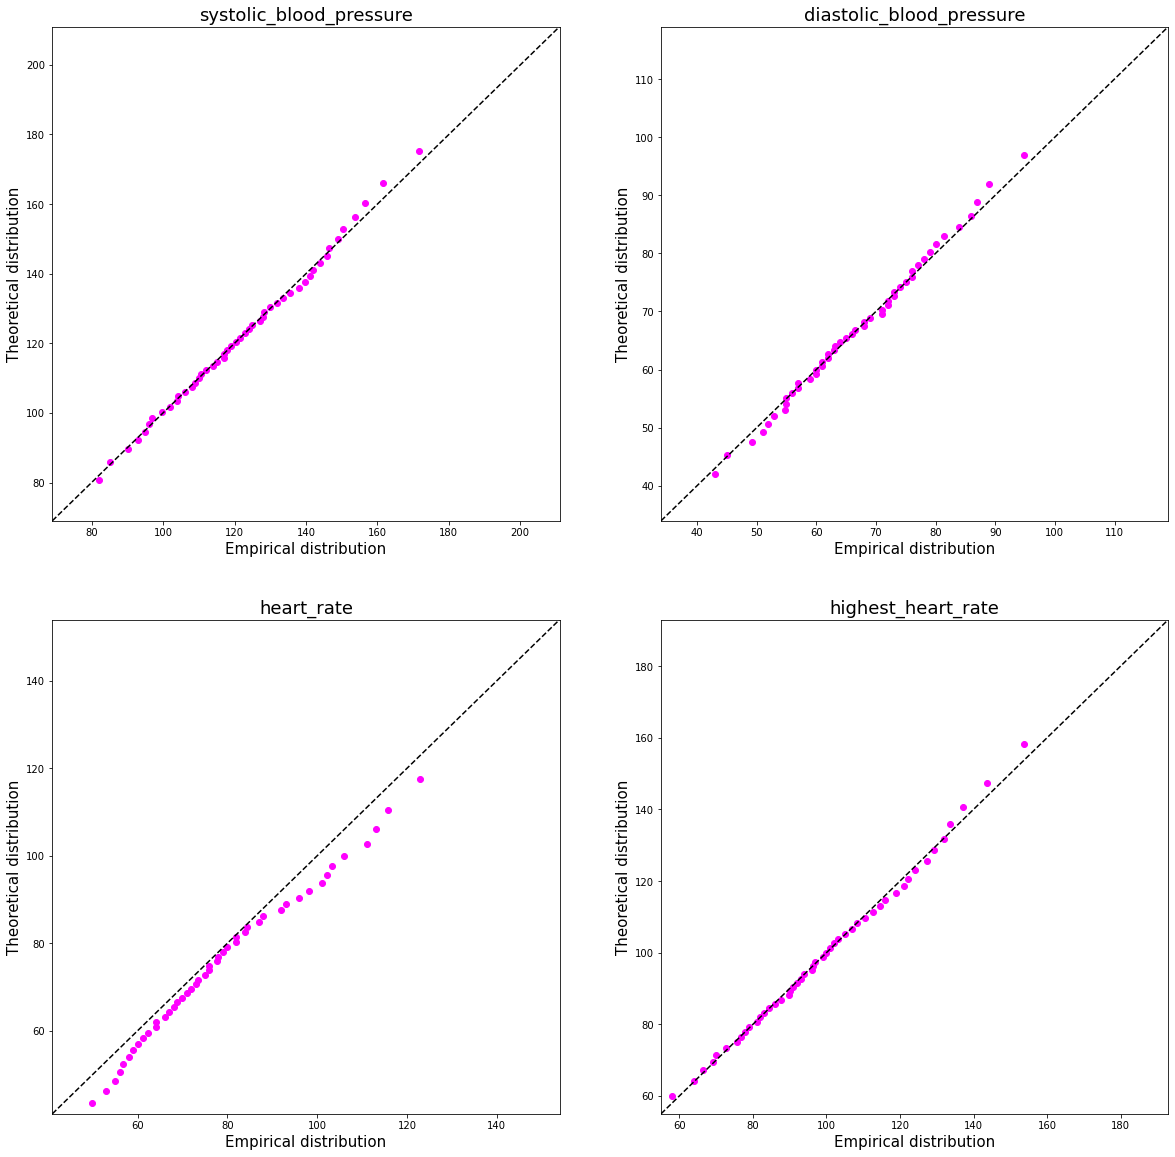

In [8]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0

# Prepare percentiles (quantiles) points
percs_num = 50
percs = np.linspace(0, 100, percs_num)

for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]
        # Calculation of quantiles
        qn_real = np.percentile(df[col_name], percs)

        if col_name == 'systolic_blood_pressure' or col_name == 'diastolic_blood_pressure':
            qn_theor = sp.stats.lognorm.ppf(percs / 100.0, *mle_params_list[col_idx])
        elif col_name == 'highest_heart_rate':
            qn_theor = sp.stats.chi2.ppf(percs / 100.0, *mle_params_list[col_idx])
        elif col_name == 'heart_rate':
            qn_theor = sp.stats.chi2.ppf(percs / 100.0, *lse_params_list[col_idx])

        # Building a quantile biplot
        min_amount, max_amount = df[col_name].min(), df[col_name].max()

        axes[i, j].plot(qn_real, qn_theor, ls="", marker="o", markersize=6, color='magenta')
        axes[i, j].plot([min_amount, max_amount], [min_amount, max_amount], color="k", ls="--")
        axes[i, j].set_xlim(min_amount, max_amount)
        axes[i, j].set_ylim(min_amount, max_amount)
        axes[i, j].set_xlabel('Empirical distribution', fontsize = 15)
        axes[i, j].set_ylabel('Theoretical distribution', fontsize = 15)
        axes[i, j].set_title(col_names[col_idx], fontsize = 18)

        col_idx += 1


plt.show()

# Exercise №7

Estimate correctness of fitted distributions using at least 2 statistical tests.

In [16]:
# Calculation of the Kolmogorov-Smirnov test, Cramér-von Mises test  and chi-square
table = PrettyTable()
table.field_names = ["column name", "type", "Kstest", "CramerVonMises"]

for col_idx in range(len(col_names)):
    
    col_name = col_names[col_idx]

    if col_name == 'systolic_blood_pressure':
        ks = sp.stats.kstest(df[col_name], 'lognorm', lse_params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(df[col_name], 'lognorm', lse_params_list[col_idx])

    if col_name == 'diastolic_blood_pressure':
        ks = sp.stats.kstest(df[col_name], 'lognorm', mle_params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(df[col_name], 'lognorm', mle_params_list[col_idx])

    elif col_name == 'highest_heart_rate':
        ks = sp.stats.kstest(df[col_name], 'chi2', lse_params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(df[col_name], 'chi2', lse_params_list[col_idx])

    elif col_name == 'heart_rate':
        ks = sp.stats.kstest(df[col_name], 'chi2', lse_params_list[col_idx], N=100)
        cvm = sp.stats.cramervonmises(df[col_name], 'chi2', lse_params_list[col_idx])
        
    table.add_rows([[col_name,'pvalue',ks[1], cvm.pvalue]])

print(table)

+--------------------------+--------+---------------------+---------------------+
|       column name        |  type  |        Kstest       |    CramerVonMises   |
+--------------------------+--------+---------------------+---------------------+
| systolic_blood_pressure  | pvalue |  0.9659741725492194 |  0.9697951478426843 |
| diastolic_blood_pressure | pvalue |  0.8549787045786086 |  0.8689697555174076 |
|        heart_rate        | pvalue | 0.13090688919589533 | 0.05677332325000928 |
|    highest_heart_rate    | pvalue |  0.4574990258402237 | 0.23197959751588315 |
+--------------------------+--------+---------------------+---------------------+
